BY:
Kairos Siddhartha Kaizen ,
kairos@kaizen.tel ,
BCG Rise 2.0, Wave 9, DA Track.

PROJECT DESCRIPTION:
Movie Lens Case Study, Course-end Project 1.

Background of Problem Statement :
The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. Members of the GroupLens Research Project are involved in many research projects related to the fields of information filtering, collaborative filtering, and recommender systems. The project is led by professors John Riedl and Joseph Konstan. The project began to explore automated collaborative filtering in 1992 but is most well known for its worldwide trial of an automated collaborative filtering system for Usenet news in 1996. Since then the project has expanded its scope to research overall information by filtering solutions, integrating into content-based methods, as well as, improving current collaborative filtering technology.

Problem Objective :
Here, we ask you to perform the analysis using the Exploratory Data Analysis technique. You need to find features affecting the ratings of any particular movie and build a model to predict the movie ratings.

# Libraries

In [1]:
# import libraries
import numpy as np
import pandas as pd
import pandas_profiling as pf
import seaborn as sns
import re
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# import sklearn libraries
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from lightgbm import LGBMClassifier


C:\Users\kskai\AppData\Local\Temp\ipykernel_23500\2381080810.py:4: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pf


# Datasets


In [2]:
# Import datasets
df_movies = pd.read_csv("./movies.dat", sep="::", names=["MovieID","Title","Genres"], engine='python', encoding='Latin-1')
df_ratings = pd.read_csv("./ratings.dat", sep="::", names=["UserID","MovieID","Rating","Timestamp"], engine='python', encoding='Latin-1')
df_users = pd.read_csv("./users.dat", sep="::", names=["UserID","Gender","Age","Occupation","Zip-code"], engine='python', encoding='Latin-1')


# Data Prep and Cleaning

In [3]:
df_movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
df_movies.shape

(3883, 3)

In [5]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   int64 
 1   Title    3883 non-null   object
 2   Genres   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [6]:
df_movies.describe()

,MovieID
count,3883.000000
mean,1986.049446
std,1146.778349
min,1.000000
25%,982.500000
50%,2010.000000
75%,2980.500000
max,3952.000000


In [7]:
# Check if any values are null or na
print('Is Null?\n', df_movies.isnull().sum())
print('\nIs Na?\n', df_movies.isna().sum())

Is Null?
 MovieID    0
Title      0
Genres     0
dtype: int64

Is Na?
 MovieID    0
Title      0
Genres     0
dtype: int64


In [8]:
df_users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [9]:
df_users.shape

(6040, 5)

In [10]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [11]:
df_users.describe()

,UserID,Age,Occupation
count,6040.000000,6040.000000,6040.000000
mean,3020.500000,30.639238,8.146854
std,1743.742145,12.895962,6.329511
min,1.000000,1.000000,0.000000
25%,1510.750000,25.000000,3.000000
50%,3020.500000,25.000000,7.000000
75%,4530.250000,35.000000,14.000000
max,6040.000000,56.000000,20.000000


In [12]:
# Check if any values are null or na
print('Is Null?\n', df_users.isnull().sum())
print('\nIs Na?\n', df_users.isna().sum())

Is Null?
 UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

Is Na?
 UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64


In [13]:
df_ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [14]:
df_ratings.shape

(1000209, 4)

In [15]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   UserID     1000209 non-null  int64
 1   MovieID    1000209 non-null  int64
 2   Rating     1000209 non-null  int64
 3   Timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [16]:
df_ratings.describe()

,UserID,MovieID,Rating,Timestamp
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


In [17]:
# Check if any values are null or na
print('Is Null?\n', df_ratings.isnull().sum())
print('\nIs Na?\n', df_ratings.isna().sum())

Is Null?
 UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64

Is Na?
 UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64


# Master Data

In [18]:
df_movies_n_ratings = df_movies.merge(df_ratings, how='inner', on='MovieID')
df_movies_n_ratings.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [19]:
print(df_movies_n_ratings.shape)

(1000209, 6)


In [20]:
df_master = df_movies_n_ratings.merge(df_users, how='inner', on='UserID')
df_master.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [21]:
df_master.shape

(1000209, 10)

In [22]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   MovieID     1000209 non-null  int64 
 1   Title       1000209 non-null  object
 2   Genres      1000209 non-null  object
 3   UserID      1000209 non-null  int64 
 4   Rating      1000209 non-null  int64 
 5   Timestamp   1000209 non-null  int64 
 6   Gender      1000209 non-null  object
 7   Age         1000209 non-null  int64 
 8   Occupation  1000209 non-null  int64 
 9   Zip-code    1000209 non-null  object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


# NAs and Duplicates

In [23]:
# Eliminate Missing values

print('Original Dataset shape: {}'.format(df_master.shape))
print('Dropped missing values: {}'.format(df_master.dropna().shape))
print('Percent missing values in dataset: {}'.format(((len(df_master) - len(df_master.dropna()))/len(df_master))*100))

# Dropping the rows which have missing values in them (in-place)
df_master.dropna(inplace=True)

Original Dataset shape: (1000209, 10)
Dropped missing values: (1000209, 10)
Percent missing values in dataset: 0.0


In [24]:
# Eliminate Duplicate values 

print('Original Dataset shape: {}'.format(df_master.shape))
print('Dropped duplicate values: {}'.format(df_master.drop_duplicates().shape))
print('Percent Duplicate values in dataset: {}'.format(((len(df_master) - len(df_master.drop_duplicates()))/len(df_master))*100))

# Dropping duplicates
df_master.drop_duplicates(inplace=True)

Original Dataset shape: (1000209, 10)
Dropped duplicate values: (1000209, 10)
Percent Duplicate values in dataset: 0.0


# Reports and Summaries

In [25]:
pfr = pf.ProfileReport(df_master)
pfr

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [26]:
# Re-checking summary of the dataset
df_master.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
MovieID,1000209.0,NaN,NaN,NaN,1865.539898,1096.040689,1.0,1030.0,1835.0,2770.0,3952.0
Title,1000209,3706,American Beauty (1999),3428,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genres,1000209,301,Comedy,116883,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UserID,1000209.0,NaN,NaN,NaN,3024.512348,1728.412695,1.0,1506.0,3070.0,4476.0,6040.0
Rating,1000209.0,NaN,NaN,NaN,3.581564,1.117102,1.0,3.0,4.0,4.0,5.0
Timestamp,1000209.0,NaN,NaN,NaN,972243695.404665,12152558.939916,956703932.0,965302637.0,973018006.0,975220939.0,1046454590.0
Gender,1000209,2,M,753769,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,1000209.0,NaN,NaN,NaN,29.738314,11.751983,1.0,25.0,25.0,35.0,56.0
Occupation,1000209.0,NaN,NaN,NaN,8.036138,6.531336,0.0,2.0,7.0,14.0,20.0
Zip-code,1000209,3439,94110,3802,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Feature Grouping

In [27]:
df_master.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


No features can/ should be further grouped.

# Age Groups

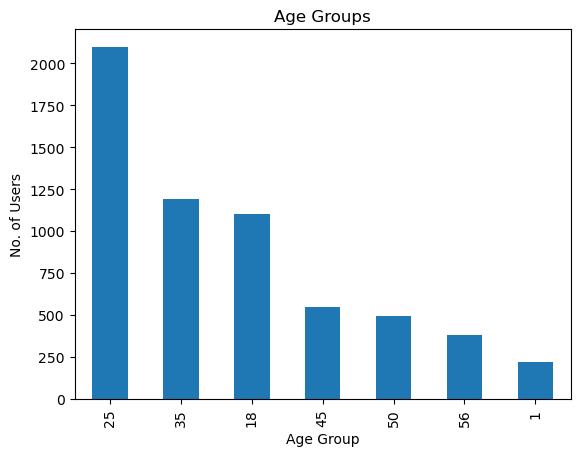

In [28]:
df_users['Age'].value_counts().plot(kind='bar')
plt.title("Age Groups")
plt.xlabel("Age Group")
plt.ylabel('No. of Users')
plt.show()

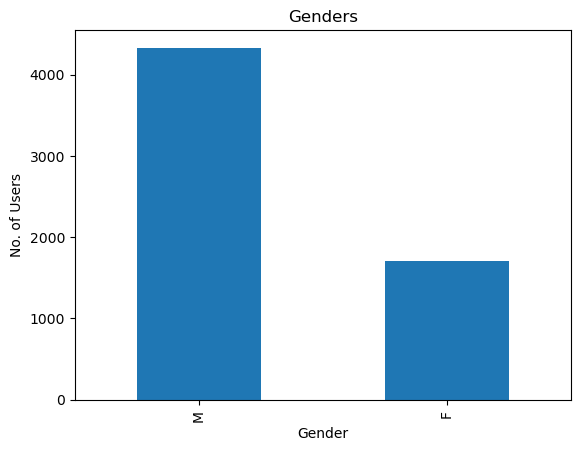

In [29]:
df_users['Gender'].value_counts().plot(kind='bar')
plt.title("Genders")
plt.xlabel("Gender")
plt.ylabel('No. of Users')
plt.show()

# Toy Story Ratings

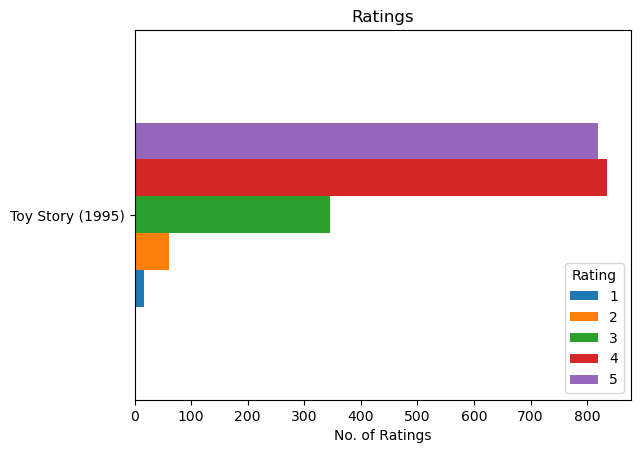

In [30]:
df_toystory = df_master[df_master.Title == 'Toy Story (1995)']
df_toystory.groupby(["Title","Rating"]).size().unstack().plot(kind='barh', stacked=False, legend=True)
plt.title("Ratings")
plt.xlabel("No. of Ratings")
plt.ylabel('')
plt.show()

# Top 25 Highest-Rated Movies

In [31]:
avg_ratings = df_master.groupby(['Title']).agg({'Rating':'mean'})
top25_movies = avg_ratings.sort_values('Rating', ascending=False).head(25)
print('All-Time Top 25 Movies by (Avg) Rating\n', top25_movies)

All-Time Top 25 Movies by (Avg) Rating
                                                       Rating
Title                                                       
Ulysses (Ulisse) (1954)                             5.000000
Lured (1947)                                        5.000000
Follow the Bitch (1998)                             5.000000
Bittersweet Motel (2000)                            5.000000
Song of Freedom (1936)                              5.000000
One Little Indian (1973)                            5.000000
Smashing Time (1967)                                5.000000
Schlafes Bruder (Brother of Sleep) (1995)           5.000000
Gate of Heavenly Peace, The (1995)                  5.000000
Baby, The (1973)                                    5.000000
I Am Cuba (Soy Cuba/Ya Kuba) (1964)                 4.800000
Lamerica (1994)                                     4.750000
Apple, The (Sib) (1998)                             4.666667
Sanjuro (1962)                               

# Top 25 Most-Rated Movies

<Axes: ylabel='Title'>

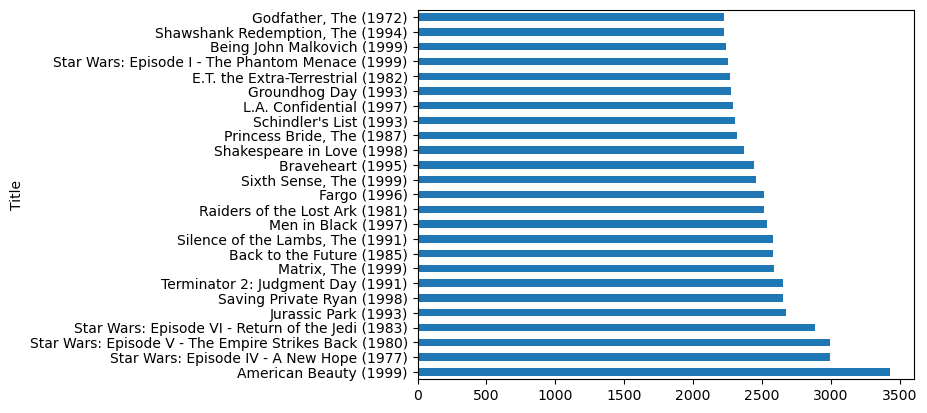

In [32]:
top25_most_rated = df_master.groupby(['Title']).size().sort_values(ascending=False)[:25]
plt.xlabel("No. of Ratings")
top25_most_rated.plot(kind="barh")

# User-2696 Ratings

In [33]:
user2696_ratings = df_master[df_master['UserID']==2696]
print('Shape:\n',user2696_ratings.shape)
print('\n-----------\n')
print('\nInfo:\n',user2696_ratings.info())

Shape:
 (20, 10)

-----------

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 991035 to 991054
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   MovieID     20 non-null     int64 
 1   Title       20 non-null     object
 2   Genres      20 non-null     object
 3   UserID      20 non-null     int64 
 4   Rating      20 non-null     int64 
 5   Timestamp   20 non-null     int64 
 6   Gender      20 non-null     object
 7   Age         20 non-null     int64 
 8   Occupation  20 non-null     int64 
 9   Zip-code    20 non-null     object
dtypes: int64(6), object(4)
memory usage: 1.7+ KB

Info:
 None


User-2696 has provided 20 ratings so far.


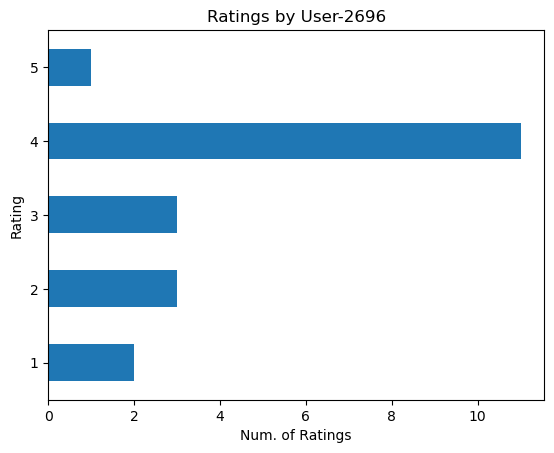

In [34]:
print(f"User-2696 has provided {user2696_ratings.shape[0]} ratings so far.")
user2696_ratings.groupby(['Rating']).size().plot(kind='barh', stacked=False)
plt.title("Ratings by User-2696")
plt.xlabel('Num. of Ratings')
plt.ylabel("Rating")
plt.show()

# Unique Genres

In [35]:
genres = df_master.Genres.str.split('|').values
genres

array([list(['Animation', "Children's", 'Comedy']),
       list(['Animation', "Children's", 'Musical', 'Romance']),
       list(['Drama']), ..., list(['Comedy', 'Romance']),
       list(['Action', 'Thriller']), list(['Action', 'Drama'])],
      dtype=object)

In [36]:
# Create an empty set to store unique genres
unique_genres = set()

# Loop through each list of genres and add them to the set
for g in genres:
    unique_genres.update(g)

# The 'unique_genres' set now contains all the unique genres
print('***')
print(f'There are {len(unique_genres)} unique genres.')
print('***')
unique_genres


***
There are 18 unique genres.
***


{'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

# Features vs Rating

<function matplotlib.pyplot.show(close=None, block=None)>

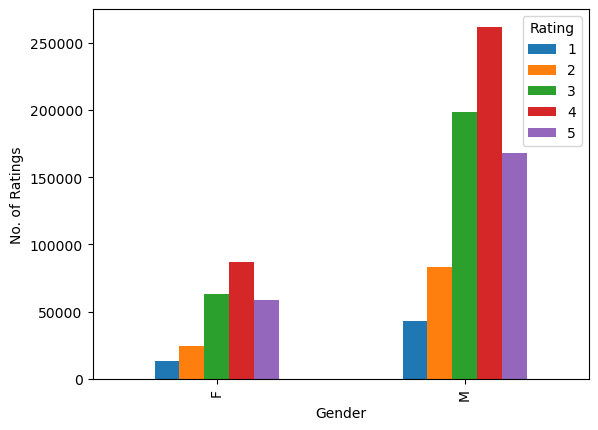

In [37]:
df_master.groupby(['Gender', 'Rating']).size().unstack().plot(kind='bar', stacked=False, legend=True)
plt.xlabel('Gender')
plt.ylabel('No. of Ratings')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

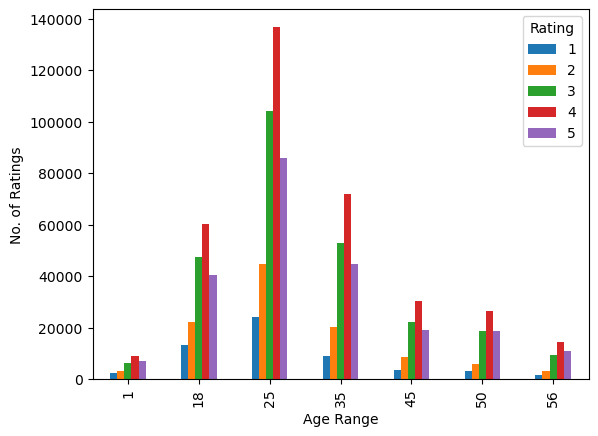

In [38]:
df_master.groupby(['Age', 'Rating']).size().unstack().plot(kind='bar', stacked=False, legend=True)
plt.xlabel('Age Range')
plt.ylabel('No. of Ratings')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

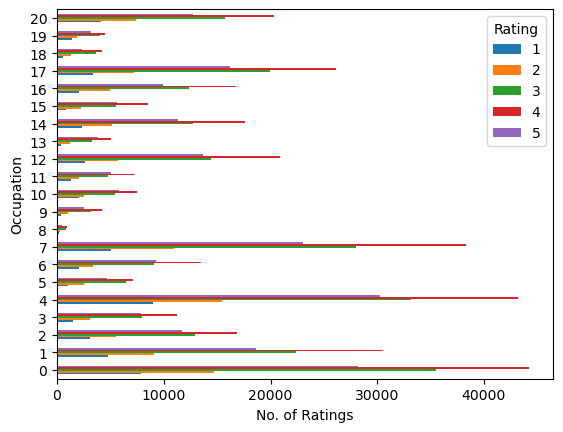

In [39]:
df_master.groupby(['Occupation', 'Rating']).size().unstack().plot(kind='barh', stacked=False, legend=True)
plt.ylabel('Occupation')
plt.xlabel('No. of Ratings')
plt.show

# Label/ Dummy Encodings
One Hot Encoding (OHE) will be applied to Genres, Gender, Occupation, and Age.

In [40]:
ohe_genres = df_master['Genres'].str.get_dummies("|")
df_master = pd.concat([df_master, ohe_genres], axis=1)

# Dropping the now-encoded 'Genres' column, plus the first encoded-column 'Action'.
df_master = df_master.drop(['Genres', 'Action'], axis=1)

df_master.head().T

,0,1,2,3,4
MovieID,1,48,150,260,527
Title,Toy Story (1995),Pocahontas (1995),Apollo 13 (1995),Star Wars: Episode IV - A New Hope (1977),Schindler's List (1993)
UserID,1,1,1,1,1
Rating,5,5,5,4,5
Timestamp,978824268,978824351,978301777,978300760,978824195
Gender,F,F,F,F,F
Age,1,1,1,1,1
Occupation,10,10,10,10,10
Zip-code,48067,48067,48067,48067,48067
Adventure,0,0,0,1,0


In [41]:
ohe_gender = pd.get_dummies(df_master['Gender'])
ohe_gender.columns = ['Female', 'Male']
df_master = pd.concat([df_master, ohe_gender], axis=1)

# Dropping the now-encoded 'Gender' column, plus the first encoded-column 'Female'.
df_master = df_master.drop(['Gender', 'Female'], axis=1)

df_master.head().T

,0,1,2,3,4
MovieID,1,48,150,260,527
Title,Toy Story (1995),Pocahontas (1995),Apollo 13 (1995),Star Wars: Episode IV - A New Hope (1977),Schindler's List (1993)
UserID,1,1,1,1,1
Rating,5,5,5,4,5
Timestamp,978824268,978824351,978301777,978300760,978824195
Age,1,1,1,1,1
Occupation,10,10,10,10,10
Zip-code,48067,48067,48067,48067,48067
Adventure,0,0,0,1,0
Animation,1,1,0,0,0


In [42]:
df_master.Occupation.value_counts()

4     131032
0     130499
7     105425
1      85351
17     72816
20     60397
12     57214
2      50068
14     49109
16     46021
6      37205
3      31623
10     23290
15     22951
5      21850
11     20563
19     14904
13     13754
18     12086
9      11345
8       2706
Name: Occupation, dtype: int64

In [43]:
df_master = df_master.join(pd.get_dummies(df_master.Occupation, prefix='Occupation'))

# Dropping the now-encoded 'Occupation' column, plus the first encoded-column 'Occupation_0'.
df_master = df_master.drop(['Occupation', 'Occupation_0'], axis=1)

df_master.head().T

,0,1,2,3,4
MovieID,1,48,150,260,527
Title,Toy Story (1995),Pocahontas (1995),Apollo 13 (1995),Star Wars: Episode IV - A New Hope (1977),Schindler's List (1993)
UserID,1,1,1,1,1
Rating,5,5,5,4,5
Timestamp,978824268,978824351,978301777,978300760,978824195
Age,1,1,1,1,1
Zip-code,48067,48067,48067,48067,48067
Adventure,0,0,0,1,0
Animation,1,1,0,0,0
Children's,1,1,0,0,0


In [44]:
# Encoding Age

df_master = df_master.join(pd.get_dummies(df_master.Age, prefix='Age', drop_first=True))

# Dropping the now-encoded 'Age' column.
df_master = df_master.drop(['Age'], axis=1)

df_master.head().T

,0,1,2,3,4
MovieID,1,48,150,260,527
Title,Toy Story (1995),Pocahontas (1995),Apollo 13 (1995),Star Wars: Episode IV - A New Hope (1977),Schindler's List (1993)
UserID,1,1,1,1,1
Rating,5,5,5,4,5
Timestamp,978824268,978824351,978301777,978300760,978824195
Zip-code,48067,48067,48067,48067,48067
Adventure,0,0,0,1,0
Animation,1,1,0,0,0
Children's,1,1,0,0,0
Comedy,1,0,0,0,0


# Features Selection

In [45]:
X = df_master.drop(['MovieID', 'Title', 'UserID', 'Timestamp', 'Zip-code'], axis=1)

# Removing target variable
X = X.drop(['Rating'], axis=1)

print(f"X.shape: {X.shape}")
X.head().T

X.shape: (1000209, 44)


,0,1,2,3,4
Adventure,0,0,0,1,0
Animation,1,1,0,0,0
Children's,1,1,0,0,0
Comedy,1,0,0,0,0
Crime,0,0,0,0,0
Documentary,0,0,0,0,0
Drama,0,0,1,0,1
Fantasy,0,0,0,1,0
Film-Noir,0,0,0,0,0
Horror,0,0,0,0,0


In [46]:
print("Features affecting the ratings of a movie:")
X.columns

Features affecting the ratings of a movie:


Index(['Adventure', 'Animation', 'Children's', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'Male',
       'Occupation_1', 'Occupation_2', 'Occupation_3', 'Occupation_4',
       'Occupation_5', 'Occupation_6', 'Occupation_7', 'Occupation_8',
       'Occupation_9', 'Occupation_10', 'Occupation_11', 'Occupation_12',
       'Occupation_13', 'Occupation_14', 'Occupation_15', 'Occupation_16',
       'Occupation_17', 'Occupation_18', 'Occupation_19', 'Occupation_20',
       'Age_18', 'Age_25', 'Age_35', 'Age_45', 'Age_50', 'Age_56'],
      dtype='object')

In [47]:
y = df_master['Rating']
print(f"y.shape: {y.shape}")

y.shape: (1000209,)


# Collinearity Check

In [48]:
X.corr()

,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,...,Occupation_17,Occupation_18,Occupation_19,Occupation_20,Age_18,Age_25,Age_35,Age_45,Age_50,Age_56
Adventure,1.000000,0.004732,0.098283,-0.124960,-0.045924,-0.035109,-0.194570,0.227046,-0.014178,-0.057256,...,0.024713,0.004900,-0.002423,-0.013836,0.013226,-0.002052,0.000224,-0.004905,-0.007000,-0.010730
Animation,0.004732,1.000000,0.576204,0.018544,-0.062520,-0.018991,-0.154479,0.012025,0.037013,-0.049730,...,0.002122,-0.006706,-0.004100,0.000697,0.029509,-0.006704,-0.006112,-0.012974,-0.020952,-0.015157
Children's,0.098283,0.576204,1.000000,0.058711,-0.081977,-0.024901,-0.135707,0.263280,-0.038033,-0.077099,...,0.000086,-0.003828,-0.000690,-0.001426,0.036713,-0.022162,-0.003467,-0.008875,-0.019993,-0.018228
Comedy,-0.124960,0.018544,0.058711,1.000000,-0.078030,-0.040697,-0.249840,-0.006010,-0.101425,-0.093064,...,-0.011291,-0.002612,0.002544,0.004909,0.024528,0.009358,-0.008897,-0.014521,-0.021819,-0.020158
Crime,-0.045924,-0.062520,-0.081977,-0.078030,1.000000,-0.026243,0.070479,-0.033745,0.136237,-0.047899,...,0.001228,0.002295,0.000359,0.001675,0.007422,0.011893,-0.008614,-0.008048,-0.003488,-0.002105
Documentary,-0.035109,-0.018991,-0.024901,-0.040697,-0.026243,1.000000,-0.062194,-0.017326,-0.012175,-0.025673,...,-0.008813,-0.002126,0.001317,0.012811,-0.010803,0.008329,0.003795,0.001044,-0.000796,-0.002730
Drama,-0.194570,-0.154479,-0.135707,-0.249840,0.070479,-0.062194,1.000000,-0.096929,-0.067297,-0.189551,...,-0.023828,-0.011343,-0.005896,0.015943,-0.037535,-0.006462,0.005510,0.018853,0.028639,0.038145
Fantasy,0.227046,0.012025,0.263280,-0.006010,-0.033745,-0.017326,-0.096929,1.000000,-0.026464,-0.055803,...,0.008236,0.002024,0.002122,-0.006554,0.016765,-0.000722,-0.002899,-0.006573,-0.010390,-0.012723
Film-Noir,-0.014178,0.037013,-0.038033,-0.101425,0.136237,-0.012175,-0.067297,-0.026464,1.000000,-0.039157,...,-0.001478,-0.001685,-0.000130,0.010387,-0.020660,-0.010428,0.010134,0.008986,0.015742,0.019302
Horror,-0.057256,-0.049730,-0.077099,-0.093064,-0.047899,-0.025673,-0.189551,-0.055803,-0.039157,1.000000,...,0.005477,0.027494,0.012111,-0.004180,0.011353,0.007902,-0.000715,-0.002653,-0.012415,-0.023412


<Axes: >

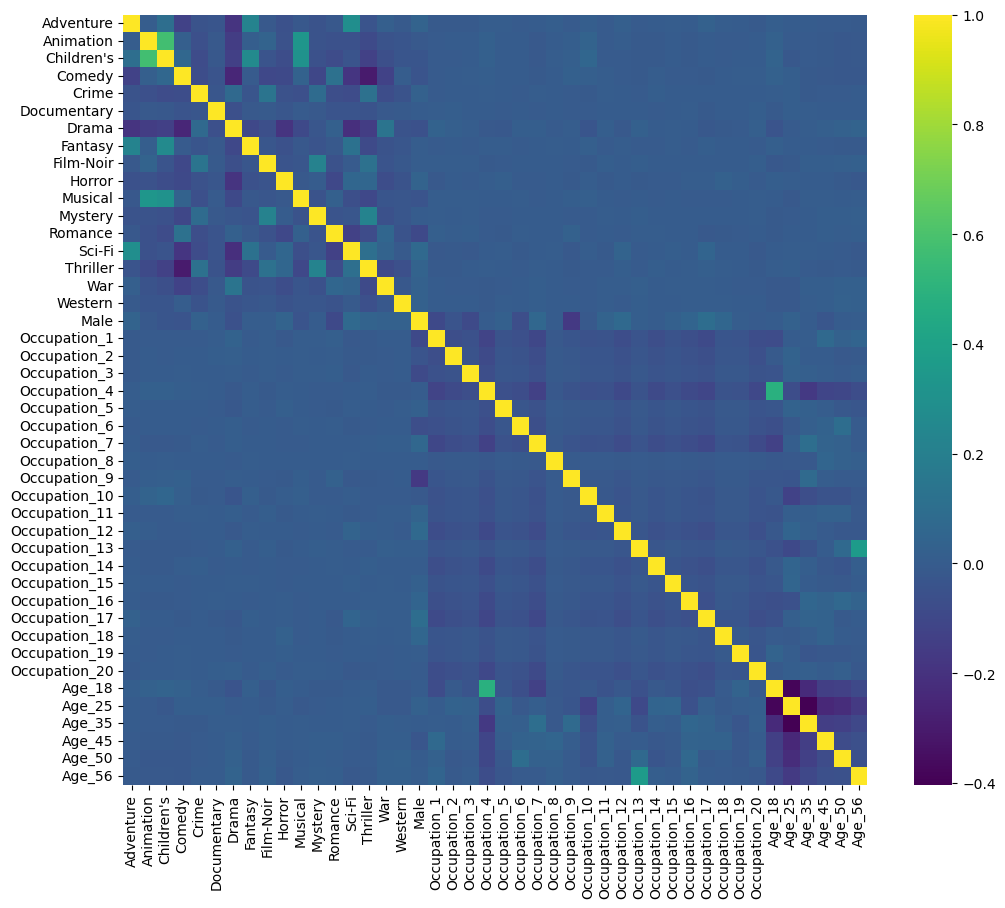

In [49]:
plt.figure(figsize=(12,10))
sns.heatmap(X.corr(), xticklabels=True, yticklabels=True, cmap='viridis')

# Checking Against Correlation Threshold

In [50]:
corr_threshold = 0.8

from collections import defaultdict

X_corr = X.corr()

flag = False

corr_dict = defaultdict(list)

for row in X_corr.index:
    for col in X_corr.columns:
        if (col!=row) and (abs(X_corr.loc[row, col]) >= corr_threshold):
            flag = True
            corr_dict[row].append(col)

if flag:
    print('***')
    print('High correlation present!')
    print(corr_dict)
    print('***')
else:
    print('***')
    print('No high correlation present!')
    print('***')

***
No high correlation present!
***


# Variance Inflation Factor (VIF)

In [51]:
'''
# NOTE!!!
# not sure what im doing wrong, it runs for over 10 minutes and doesnt seem to end.


#VIF
#remove/encode all categorical variables prior to running this
from statsmodels.stats.outliers_influence import variance_inflation_factor

for i,k in enumerate(X.columns):
    print(i+1,'. ', k,': ', round(variance_inflation_factor(X.values, i),2),sep='')

# VIF function import
from statsmodels.stats.outliers_influence import variance_inflation_factor    

# define function to calculate VIF for all columns with a threshold of 3.

def calculate_vif_(df, thresh=3):
    """
    The function calculates VIF for all columns, then drops the column with highest VIF above the threshold.
    The process is then repeated till there are no columns with VIF above the threshold.
    Function outputs the list of columns to be dropped.
    The columns are NOT actually dropped from the input dataframe
    Input Dataframe should only have numeric columns
    """
    variables = list(range(df.shape[1]))
    drop_cols = list()
    dropped = True
    
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(df.iloc[:, variables].values, ix) for ix in range(df.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print(df.iloc[:, variables].columns[maxloc])
            drop_cols.append(df.iloc[:, variables].columns[maxloc])
            del variables[maxloc]
            dropped = True

    print('---')
    print('Columns to be dropped:')
    print(drop_cols)
    return drop_cols
    
drop_cols= calculate_vif_(X)

'''

'\n# NOTE!!!\n# not sure what im doing wrong, it runs for over 10 minutes and doesnt seem to end.\n\n\n#VIF\n#remove/encode all categorical variables prior to running this\nfrom statsmodels.stats.outliers_influence import variance_inflation_factor\n\nfor i,k in enumerate(X.columns):\n    print(i+1,\'. \', k,\': \', round(variance_inflation_factor(X.values, i),2),sep=\'\')\n\n# VIF function import\nfrom statsmodels.stats.outliers_influence import variance_inflation_factor    \n\n# define function to calculate VIF for all columns with a threshold of 3.\n\ndef calculate_vif_(df, thresh=3):\n    """\n    The function calculates VIF for all columns, then drops the column with highest VIF above the threshold.\n    The process is then repeated till there are no columns with VIF above the threshold.\n    Function outputs the list of columns to be dropped.\n    The columns are NOT actually dropped from the input dataframe\n    Input Dataframe should only have numeric columns\n    """\n    varia

In [52]:
# dropping above columns
# X.drop(drop_cols,axis=1,inplace=True)

# Train Test Splitting

In [53]:
# Reducing size of data
X = X[:5000]
y = y[:5000]

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=111, stratify=y)

# Machine Learning Models

In [55]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)

print('***')
print(f"Logistic Regression accuracy is: {acc_log}.")
print('***')

***
Logistic Regression accuracy is: 42.0.
***


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
# LGBM Classifier

lgb = LGBMClassifier(boosting_type='gbdt', n_jobs=-1, objective='multiclass')
lgb.fit(X_train, y_train)
y_pred = lgb.predict(X_test)
acc_lgbmc = accuracy_score(y_test, y_pred)*100

print('***')
print(f"LGBM Classifier accuracy is: {acc_lgbmc}")
print('***')

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001216 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 3750, number of used features: 33
[LightGBM] [Info] Start training from score -3.148107
[LightGBM] [Info] Start training from score -2.206064
[LightGBM] [Info] Start training from score -1.231915
[LightGBM] [Info] Start training from score -1.113117
[LightGBM] [Info] Start training from score -1.484275
***
LGBM Classifier accuracy is: 37.6
***


In [57]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

print('***')
print(f"Gaussian Naive Bayes accuracy is: {acc_gaussian}.")
print('***')

***
Gaussian Naive Bayes accuracy is: 9.84.
***


In [58]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)

print('***')
print(f"Perceptron accuracy is: {acc_perceptron}.")
print('***')

***
Perceptron accuracy is: 33.47.
***


In [59]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)

print('***')
print(f"Linear SVC accuracy is: {acc_linear_svc}.")
print('***')

***
Linear SVC accuracy is: 41.68.
***


In [60]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)

print('***')
print(f"Stochastic Gradient Descent accuracy is: {acc_sgd}.")
print('***')

***
Stochastic Gradient Descent accuracy is: 33.73.
***


In [61]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

print('***')
print(f"Decision Tree Classifier accuracy is: {acc_decision_tree}.")
print('***')

***
Decision Tree Classifier accuracy is: 63.44.
***


In [62]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

print('***')
print(f"Random Forest accuracy is: {acc_random_forest}.")
print('***')

***
Random Forest accuracy is: 63.44.
***


In [63]:
# K Nearest Neighbors Classifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

print('***')
print(f"K-Nearest Neighbors Classifier accuracy is: {acc_knn}.")
print('***')

***
K-Nearest Neighbors Classifier accuracy is: 50.69.
***


In [64]:

# Support Vector Machines

svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)

print('***')
print(f"Support Vector Machines accuracy is: {acc_svc}")
print('***')

***
Support Vector Machines accuracy is: 47.73
***


In [65]:
print("These results are based on the following sample size:")
print(f"\tX.shape: {X.shape}")
print(f"\ty.shape: {y.shape}")
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'LGBM Classifier'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree, acc_lgbmc]})
models_sorted = models.sort_values(by='Score', ascending=False)
models_sorted

These results are based on the following sample size:
	X.shape: (5000, 44)
	y.shape: (5000,)


,Model,Score
3,Random Forest,63.44
8,Decision Tree,63.44
1,KNN,50.69
0,Support Vector Machines,47.73
2,Logistic Regression,42.00
7,Linear SVC,41.68
9,LGBM Classifier,37.60
6,Stochastic Gradient Decent,33.73
5,Perceptron,33.47
4,Naive Bayes,9.84


These results are based on the following sample size:
	X.shape: (5000, 44)
	y.shape: (5000,)


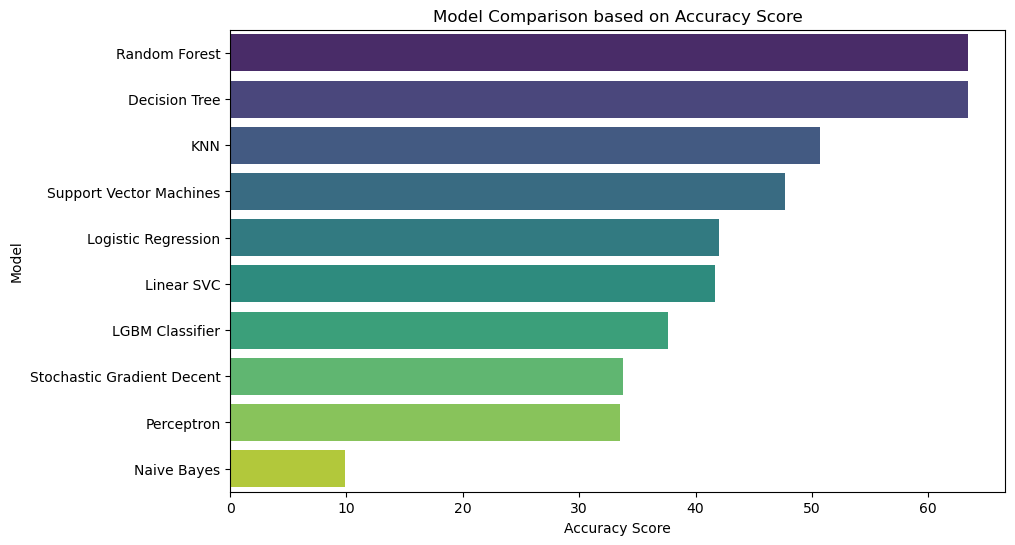

In [66]:
print("These results are based on the following sample size:")
print(f"\tX.shape: {X.shape}")
print(f"\ty.shape: {y.shape}")
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Model', data=models_sorted, palette='viridis')
plt.xlabel('Accuracy Score')
plt.ylabel('Model')
plt.title('Model Comparison based on Accuracy Score')
plt.show()

# END OF DOCUMENT